# SPY Market Volatility Analysis


### This notebook performs several analyses on 8 years of historical SPY data. The purpose is to determine if there is a relationship between X (market volume) and Y (price volatility), and if so, is it worth pursuing further with more sophisticated analysis methods?

In [49]:
#Professor's Instructions

# Not-exhaustive project checklist
# Note: this is not a writing assignment, but you should still incorporate comments or headers throughout
# -- This will help others who review your work, but will also help you keep track of what you're doing
# -- Just think about what would help you understand a peer's project when you have to grade theirs later


# 1) Dataset included
# 1a) Dataset explained/documented when used
# 2) Analysis performed
# 2a) Analysis steps documented, explained briefly
# 3) Visualizations/outputs
# 4) Conclusion
# ---Did you answer your questions?
# ---Did you find anything else?
# ---What problems did you run into?
# ---Any suggestions for future research?

# Critical checks before submission
# - Does the noteboook run without error? (Kernel>restart & run all => no errors at all? No long periods of processing?)
# - Do you have your dataset included here? You shouldn't be connecting to any external data
# - - Even if external datasets work here, they WILL NOT work for peer-grading, and you may get a 0.

### Project Information
1) Dataset included: SPY historical daily data from 01/01/2015 - 01/01/2023 <br>
------1a) Dataset downloaded from Yahoo Finance and will be called something like "df_SPY". This step will also include any dataframe cleaning steps (difficult to do anything complicated because the dataset is already fairly clean coming from Yahoo Finance) <br>
2) Analysis Goal: goal is to see if daily price fluctuations (high - low) has a significant relationship with daily volume numbers. This aims to answer the question: Is there a strong enough relationship between X (daily volume) and Y (daily price volatility) to pursue further modeling? <br>
------2a) the steps are documented cell by cell below. The analyses include Pearson's correlation, coefficient of determination (COD), and a test attempt at linear regression. <br>
3) Visualizations are included in both of 2) and 2a) steps see if relationship may exist. <br>
4) Results and Conclusion: Pearson's correlation is .56, the coefficient of determination is -3.72, and the linear regression did not match the data. Pearson's correlation confirms that a relationship exists on some level while the COD and linear regression confirm that a more sophisticated method of analysis is required to uncover the potential prediction possibilities. <br>
------4a) Yes my question was answered- this is worth more investigation with more sophisticated methods of modeling. <br>
------4b) Through data visualization for (2a part 1), I found that about 2/3 through the dataset the price spiked up while volume did not. I found that to be interesting as I would have expected volume to be higher than it was compared to previous years.<br>
------4b continued) I almost completed a data cleansing step to remove volume outliers from the dataset but then realized that periods of high volume spikes occur when the market prices take a huge downturn. This is why I kept the outliers because I realized they could add usable information.<br>
------4c) I ran into a problem while plotting where I needed to use a secondary y axis to visualize volume. Other than that, the dataset was extremely clean so I had no other issues.<br>
------4d) If someone wished to predict daily price volatility, I recommend that future research should include adding other variables to the dataset such as quarterly earnings release dates or major world events. Someone could then attempt to form a volatility prediction based on Volume and those additional variables. <br>

### Remember: the project rules and rubric are documented in Piazza post @2381. If you have any questions you should ask them there. The checklist above is just an example of a template/workflow we would use.

# --------------------------------------------------------------------------------------

In [38]:
import pandas as pd
import numpy as np
from io import StringIO
from IPython.display import display
import time
import matplotlib.pyplot as plt

## 1) importing df_SPY and 1a) cleaning dataset 

In [39]:
print ("Reading ...")
start_time = time.time ()

path = "SPY.csv"
df_SPY = pd.read_csv(path)

elapsed_time = time.time () - start_time
print ("==> Took %g seconds." % elapsed_time)

Reading ...
==> Took 0.00977659 seconds.


In [40]:
display(df_SPY)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,206.380005,206.880005,204.179993,205.429993,176.788895,121465900
1,2015-01-05,204.169998,204.369995,201.350006,201.720001,173.596176,169632600
2,2015-01-06,202.089996,202.720001,198.860001,199.820007,171.961029,209151400
3,2015-01-07,201.419998,202.720001,200.880005,202.309998,174.103851,125346700
4,2015-01-08,204.009995,206.160004,203.990005,205.899994,177.193359,147217800
...,...,...,...,...,...,...,...
2009,2022-12-23,379.649994,383.059998,378.029999,382.910004,381.454193,59857300
2010,2022-12-27,382.790009,383.149994,379.649994,381.399994,379.949921,51638200
2011,2022-12-28,381.329987,383.390015,376.420013,376.660004,375.227936,70911500
2012,2022-12-29,379.630005,384.350006,379.079987,383.440002,381.982178,66970900


In [41]:
#checking entire dataframe to see if there are any NaN values
df_SPY.isnull().values.any()

False

In [42]:
#making copy of original dataframe and removing unnecessary columns
df_SPY_drop = df_SPY.copy()
df_SPY_drop = df_SPY_drop.drop(['Open','Close','Adj Close'], axis = 1)
df_SPY_drop

,Date,High,Low,Volume
0,2015-01-02,206.880005,204.179993,121465900
1,2015-01-05,204.369995,201.350006,169632600
2,2015-01-06,202.720001,198.860001,209151400
3,2015-01-07,202.720001,200.880005,125346700
4,2015-01-08,206.160004,203.990005,147217800
...,...,...,...,...
2009,2022-12-23,383.059998,378.029999,59857300
2010,2022-12-27,383.149994,379.649994,51638200
2011,2022-12-28,383.390015,376.420013,70911500
2012,2022-12-29,384.350006,379.079987,66970900


## End of 1) and 1a)

## 2) Analysis Goal: goal is to see if daily price volatility ('High' - 'Low') has a relationship with daily volume numbers. This aims to answer the question: Is there a strong enough relationship between daily price volatility and daily volume to pursue further modeling? <br>

### 2a part 1) Visualizing trend of price high, price low, and volume before performing operations on dataset

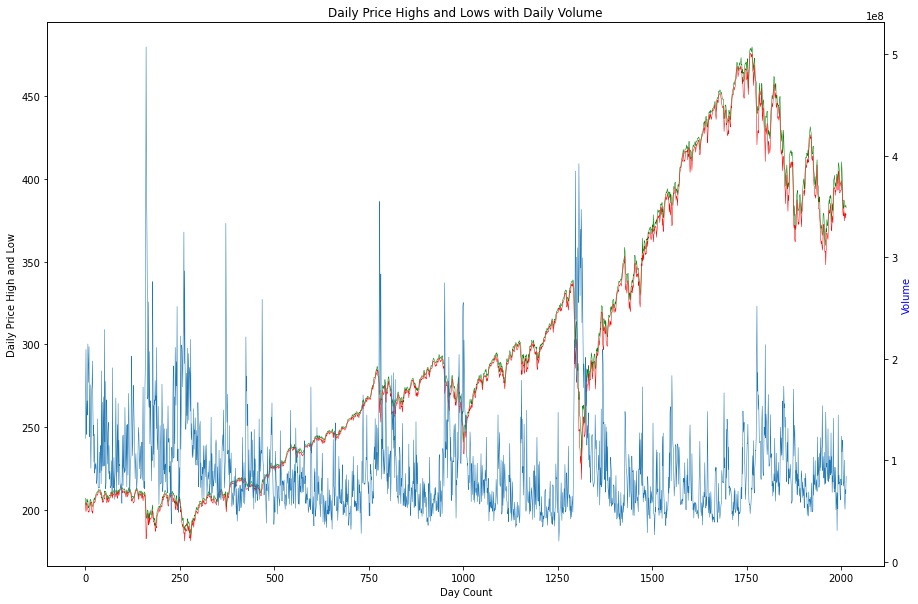

In [44]:
figure, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()

ax1.plot(df_SPY_drop[df_SPY_drop.columns[1]],linewidth=0.5,zorder=1, color = "green")
ax1.plot(df_SPY_drop[df_SPY_drop.columns[2]],linewidth=0.5,zorder=1, color = "red")
ax2.plot(df_SPY_drop[df_SPY_drop.columns[3]],linewidth=0.5,zorder=1, label = "blue")

ax1.set_xlabel('Day Count')
ax1.set_ylabel('Daily Price High and Low', color='black')
ax2.set_ylabel('Volume', color='blue')

plt.title('Daily Price Highs and Lows with Daily Volume')
plt.show()

### 2a part 2) making copy of dataset. adding a column called "daily_price_diff" which is the difference between the daily "High" and "Low" prices

In [45]:
df_SPY_1 = df_SPY_drop.copy()

In [46]:
df_SPY_1['daily_price_diff'] = df_SPY_1['High'] - df_SPY_1['Low']
df_SPY_1

,Date,High,Low,Volume,daily_price_diff
0,2015-01-02,206.880005,204.179993,121465900,2.700012
1,2015-01-05,204.369995,201.350006,169632600,3.019989
2,2015-01-06,202.720001,198.860001,209151400,3.860000
3,2015-01-07,202.720001,200.880005,125346700,1.839996
4,2015-01-08,206.160004,203.990005,147217800,2.169999
...,...,...,...,...,...
2009,2022-12-23,383.059998,378.029999,59857300,5.029999
2010,2022-12-27,383.149994,379.649994,51638200,3.500000
2011,2022-12-28,383.390015,376.420013,70911500,6.970002
2012,2022-12-29,384.350006,379.079987,66970900,5.270019


### 2a part 3) <br>
### plotting the "daily_price_diff" (volatility) column with "Volume" to visually see if they may be related. <br>
### from a quick glance, it looks like they could be related

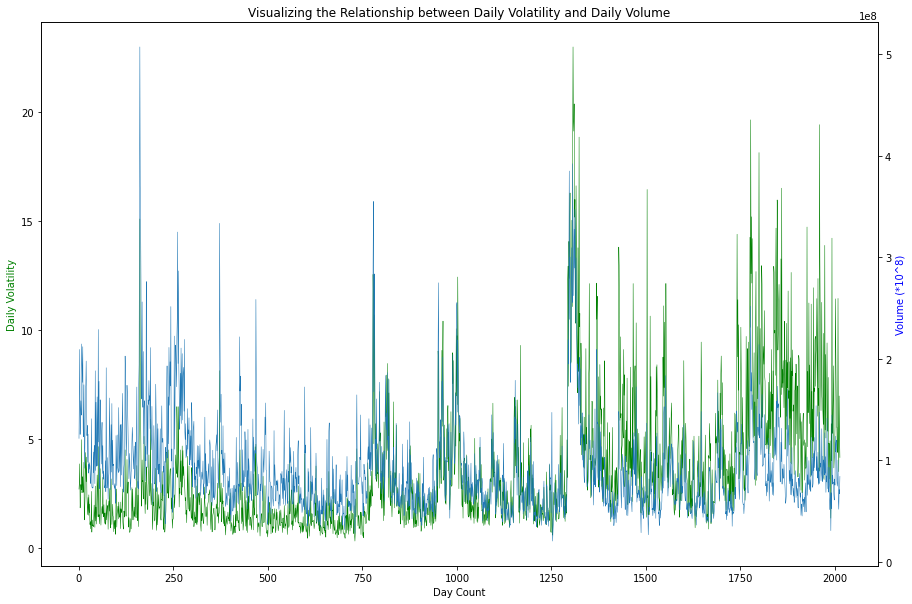

In [27]:
figure, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()

ax1.plot(df_SPY_1[df_SPY_1.columns[4]],linewidth=0.5,zorder=1, color = "green")#, label = "Daily Price Difference")
ax2.plot(df_SPY_1[df_SPY_1.columns[3]],linewidth=0.5,zorder=1, label = "blue")

ax1.set_xlabel('Day Count')
ax1.set_ylabel('Daily Volatility', color='green')
ax2.set_ylabel('Volume (*10^8)', color='blue')

plt.title('Visualizing the Relationship between Daily Volatility and Daily Volume')
plt.show()

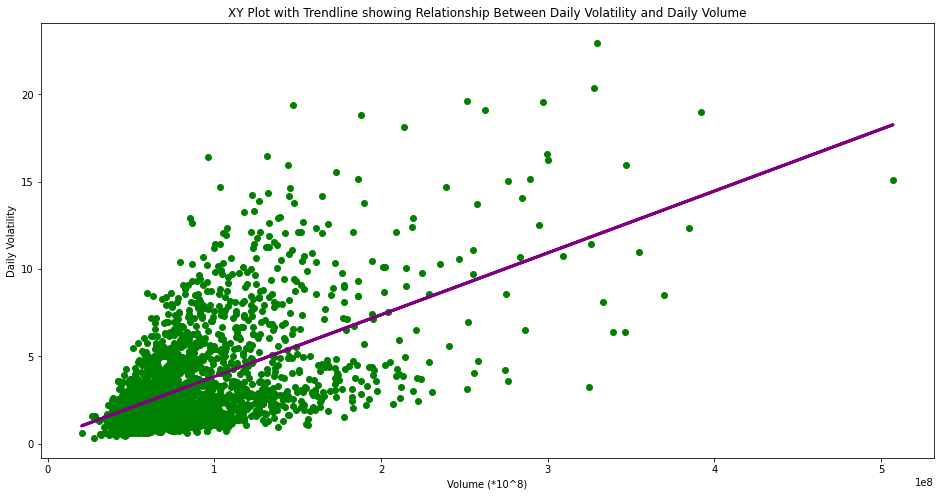

In [36]:
#Scatter Plot to further visualize
daily_price_diff = df_SPY_1[df_SPY_1.columns[4]]
volume = df_SPY_1[df_SPY_1.columns[3]]

plt.figure(figsize=(16,8))
plt.scatter(volume,daily_price_diff, marker = 'o', color = 'green')

#calculate equation for polynomial trendline
z = np.polyfit(volume,daily_price_diff, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(volume, p(volume), color = 'purple', linewidth = 3)

plt.xlabel('Volume (*10^8)')
plt.ylabel('Daily Volatility')

plt.title('XY Plot with Trendline showing Relationship Between Daily Volatility and Daily Volume')

plt.show()


### 3) Correlation Analysis 
#### Purpose is to determine how strongly the "daily_price_diff" and "Volume" columns are correlated across the 8 years in the dataframe. The correlation came out to 0.56

In [24]:
col1, col2 = "Volume", "daily_price_diff"

In [25]:
#pearson correlation
from scipy.stats import pearsonr

# Apply the pearsonr()
pearsons_corr, _ = pearsonr(df_SPY_1[col1],df_SPY_1[col2])
print("Pearson's Correlation between ", col1, " and ", col2, "is: ", round(pearsons_corr,2))

Pearson's Correlation between  Volume  and  daily_price_diff is:  0.56


### 3) Coefficient of Determination
#### Calculation to determine if Volume is a good option to use to predict price volatility in a linear regression analysis. The COD = -3.72 which means that it is not a good predictor using linear regression and other methods and/or transformations of the dependent variable may be required to reveal the relationship.

Some information about the Coefficient of Determination (different from Pearson's correlation): <br>
https://www.britannica.com/science/coefficient-of-determination <br>
"coefficient of determination, in statistics, R2 (or r2), a measure that assesses the ability of a model to predict or explain an outcome in the linear regression setting. More specifically, R2 indicates the proportion of the variance in the dependent variable (Y) that is predicted or explained by linear regression and the predictor variable (X, also known as the independent variable)."

In [14]:
#Coefficient of Determination "R^2" Score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

from sklearn.metrics import r2_score

COD_score = r2_score(df_SPY_1[col1],df_SPY_1[col2])
print("The Coefficient of Determination for ", col1, " and ", col2, "is: ", round(COD_score,2))

The Coefficient of Determination for  Volume  and  daily_price_diff is:  -3.72


## Linear Regression
#### Even though the COD determined that volume is not a good predictor using linear regression, I wanted to show an attempt at a linear regression just to confirm. The scatter plot result below confirms that it is not a good predictor under these conditions (aka when the dependent variable has not been transformed or when it is the only independent variable or when linear regression is the model fit of choice). <br>

Another indicator that this wasn't going to work is because the scatter plot demonstrates something called "heteroscedasticity" which means that the variance in the data is not distributed equally. This does not work well with linear regression.

In [15]:
def linreg_fit(x, y):
    """Returns (alpha, beta) s.t. y ~ alpha*x + beta."""
    from numpy import ones
    m = len(x) ; assert len(y) == m
    ###
    u=ones(m)
    alpha = x.dot(y) - u.dot(x)*u.dot(y)/m
    alpha /= x.dot(x) - (u.dot(x)**2)/m
    beta = u.dot(y-alpha*x)/m


    return (alpha, beta)

In [16]:
col1, col2 = "Volume", "daily_price_diff"

# Compute the coefficients for the LSD data:
x, y = df_SPY_1[col1], df_SPY_1[col2]
alpha, beta = linreg_fit(x, y)

print("alpha:", alpha)
print("beta:", beta)

alpha: -1.1671741479813948e-08
beta: 4.622453639090827


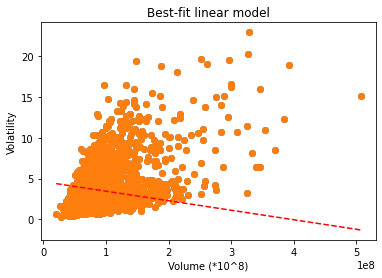

In [17]:
from numpy import linspace, floor, ceil
from matplotlib.pyplot import scatter, xlabel, ylabel, title, plot
%matplotlib inline

scatter(df_SPY_1[col1], df_SPY_1[col2])
xlabel ('LSD Tissue Concentration')
title ('Shocking news: Math scores degrade with increasing LSD!');

# Two points make a line:
x_fit = linspace(floor(x.min()), ceil(x.max()), 2)
y_fit = alpha*x_fit + beta

scatter(x, y, marker='o')
plot(x_fit, y_fit, 'r--')
xlabel('Volume (*10^8)')
ylabel('Volatility')
title('Best-fit linear model');

# --------------------------------------------------------------------------------------